In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Psychiatric Disorder Prediction/latest_psychiatric_disorder_dataset.csv')
df

,age,gender,education_level,family_history,past_diagnosis,treatment_history,symptom_checklist,behavior_patterns,diagnostic_tests,lifestyle_factors,stressors,psychiatric_disorder
0,62,Female,High School,False,True,False,Panic attacks,Aggressive behavior,Beck Depression Inventory,Physical activity level,Financial difficulties,OCD
1,65,Female,College,False,False,True,Appetite changes,Aggressive behavior,Beck Depression Inventory,Nutritional habits,Relationship problems,PTSD
2,71,Female,High School,False,True,True,Sleep disturbances,Aggressive behavior,Mini-Mental State Examination,Social support network,Work-related stress,OCD
3,18,Male,College,True,False,True,Panic attacks,Aggressive behavior,Mini-Mental State Examination,Physical activity level,Relationship problems,Substance Use Disorders
4,21,Male,High School,True,True,False,Panic attacks,Compulsive rituals,Beck Depression Inventory,Physical activity level,Relationship problems,Bipolar Disorder
...,...,...,...,...,...,...,...,...,...,...,...,...
12364,66,Male,Graduate,False,False,True,Panic attacks,Social withdrawal,Hamilton Anxiety Rating Scale,Physical activity level,Work-related stress,Substance Use Disorders
12365,59,Female,College,False,False,True,Appetite changes,Aggressive behavior,Hamilton Anxiety Rating Scale,Nutritional habits,Financial difficulties,Substance Use Disorders
12366,45,Male,Graduate,True,False,True,Panic attacks,Social withdrawal,Hamilton Anxiety Rating Scale,Social support network,Relationship problems,OCD
12367,27,Female,College,True,True,False,Sleep disturbances,Social withdrawal,Mini-Mental State Examination,Social support network,Work-related stress,Bipolar Disorder


In [83]:
df.columns

Index(['age', 'gender', 'education_level', 'family_history', 'past_diagnosis',
       'treatment_history', 'symptom_checklist', 'behavior_patterns',
       'diagnostic_tests', 'lifestyle_factors', 'stressors',
       'psychiatric_disorder'],
      dtype='object')

In [84]:
df.columns.values.tolist()

['age',
 'gender',
 'education_level',
 'family_history',
 'past_diagnosis',
 'treatment_history',
 'symptom_checklist',
 'behavior_patterns',
 'diagnostic_tests',
 'lifestyle_factors',
 'stressors',
 'psychiatric_disorder']

In [85]:
df['psychiatric_disorder'].value_counts

<bound method IndexOpsMixin.value_counts of 0                            OCD
1                           PTSD
2                            OCD
3        Substance Use Disorders
4               Bipolar Disorder
                  ...           
12364    Substance Use Disorders
12365    Substance Use Disorders
12366                        OCD
12367           Bipolar Disorder
12368                    Anxiety
Name: psychiatric_disorder, Length: 12369, dtype: object>

In [86]:
# Count the occurrences of each type of psychiatric disorder
disorder_counts = df['psychiatric_disorder'].value_counts()

# Display the counts
print(disorder_counts)

Substance Use Disorders    1228
Schizophrenia              1178
ADHD                       1148
PTSD                       1136
OCD                        1115
Depression                 1107
Bipolar Disorder           1101
Personality Disorders      1100
Other                      1091
Anxiety                    1084
Eating Disorders           1081
Name: psychiatric_disorder, dtype: int64


In [87]:
df['psychiatric_disorder'].unique().tolist()

['OCD',
 'PTSD',
 'Substance Use Disorders',
 'Bipolar Disorder',
 'Schizophrenia',
 'Eating Disorders',
 'Other',
 'ADHD',
 'Depression',
 'Anxiety',
 'Personality Disorders']

In [88]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"\n \n\n'{column}':\n {unique_values}")


 

'age':
 [62 65 71 18 21 77 57 27 37 39 68 54 41 24 42 30 76 19 56 64 35 55 43 31
 26 38 69 34 23 33 36 53 67 47 32 50 75 49 28 70 29 73 46 52 58 22 59 60
 74 45 66 48 61 20 40 72 78 79 44 63 51 25]

 

'gender':
 ['Female' 'Male']

 

'education_level':
 ['High School' 'College' 'Graduate']

 

'family_history':
 [False  True]

 

'past_diagnosis':
 [ True False]

 

'treatment_history':
 [False  True]

 

'symptom_checklist':
 ['Panic attacks' 'Appetite changes' 'Sleep disturbances']

 

'behavior_patterns':
 ['Aggressive behavior' 'Compulsive rituals' 'Social withdrawal']

 

'diagnostic_tests':
 ['Beck Depression Inventory' 'Mini-Mental State Examination'
 'Hamilton Anxiety Rating Scale']

 

'lifestyle_factors':
 ['Physical activity level' 'Nutritional habits' 'Social support network']

 

'stressors':
 ['Financial difficulties' 'Relationship problems' 'Work-related stress']

 

'psychiatric_disorder':
 ['OCD' 'PTSD' 'Substance Use Disorders' 'Bipolar Disorder' 'Schizophrenia'


In [89]:
df = df.drop(['family_history','past_diagnosis','treatment_history'], axis = 1)

In [90]:
df

,age,gender,education_level,symptom_checklist,behavior_patterns,diagnostic_tests,lifestyle_factors,stressors,psychiatric_disorder
0,62,Female,High School,Panic attacks,Aggressive behavior,Beck Depression Inventory,Physical activity level,Financial difficulties,OCD
1,65,Female,College,Appetite changes,Aggressive behavior,Beck Depression Inventory,Nutritional habits,Relationship problems,PTSD
2,71,Female,High School,Sleep disturbances,Aggressive behavior,Mini-Mental State Examination,Social support network,Work-related stress,OCD
3,18,Male,College,Panic attacks,Aggressive behavior,Mini-Mental State Examination,Physical activity level,Relationship problems,Substance Use Disorders
4,21,Male,High School,Panic attacks,Compulsive rituals,Beck Depression Inventory,Physical activity level,Relationship problems,Bipolar Disorder
...,...,...,...,...,...,...,...,...,...
12364,66,Male,Graduate,Panic attacks,Social withdrawal,Hamilton Anxiety Rating Scale,Physical activity level,Work-related stress,Substance Use Disorders
12365,59,Female,College,Appetite changes,Aggressive behavior,Hamilton Anxiety Rating Scale,Nutritional habits,Financial difficulties,Substance Use Disorders
12366,45,Male,Graduate,Panic attacks,Social withdrawal,Hamilton Anxiety Rating Scale,Social support network,Relationship problems,OCD
12367,27,Female,College,Sleep disturbances,Social withdrawal,Mini-Mental State Examination,Social support network,Work-related stress,Bipolar Disorder


In [91]:
df.columns.tolist()

['age',
 'gender',
 'education_level',
 'symptom_checklist',
 'behavior_patterns',
 'diagnostic_tests',
 'lifestyle_factors',
 'stressors',
 'psychiatric_disorder']

In [92]:
df.isnull().sum()

age                     0
gender                  0
education_level         0
symptom_checklist       0
behavior_patterns       0
diagnostic_tests        0
lifestyle_factors       0
stressors               0
psychiatric_disorder    0
dtype: int64

In [93]:
# Count the occurrences of each type of psychiatric disorder
disorder_counts = df['psychiatric_disorder'].value_counts()

# Display the counts
print(disorder_counts)

Substance Use Disorders    1228
Schizophrenia              1178
ADHD                       1148
PTSD                       1136
OCD                        1115
Depression                 1107
Bipolar Disorder           1101
Personality Disorders      1100
Other                      1091
Anxiety                    1084
Eating Disorders           1081
Name: psychiatric_disorder, dtype: int64


Text(0.5, 1.0, 'psychiatric_disorder Dataset Distribution')

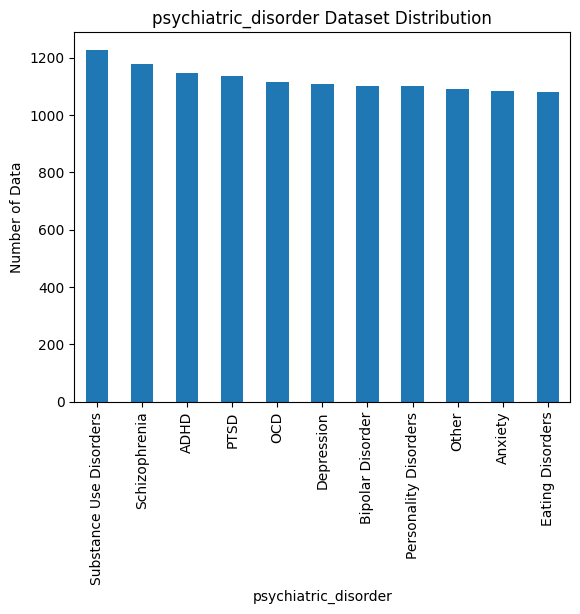

In [94]:
df['psychiatric_disorder'].value_counts().plot(kind='bar')
plt.xlabel("psychiatric_disorder")
plt.ylabel("Number of Data")
plt.xticks(rotation =90)
plt.title("psychiatric_disorder Dataset Distribution")

In [95]:
# Count the occurrences of each type of gender
disorder_counts = df['gender'].value_counts()

# Display the counts
print(disorder_counts)

Male      6220
Female    6149
Name: gender, dtype: int64


Text(0.5, 1.0, 'gender Dataset Distribution')

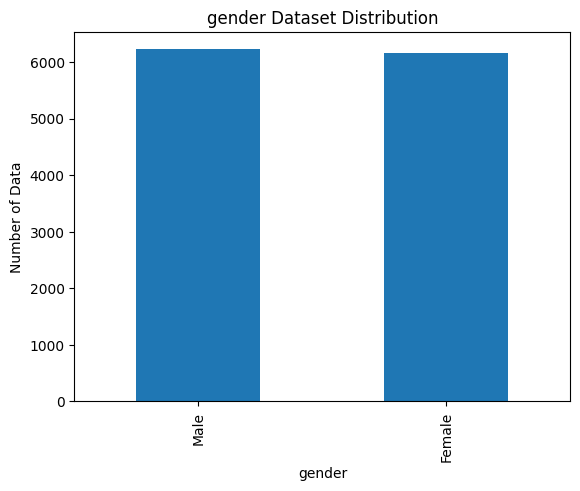

In [96]:
df['gender'].value_counts().plot(kind='bar')
plt.xlabel("gender")
plt.ylabel("Number of Data")
plt.xticks(rotation =90)
plt.title("gender Dataset Distribution")

In [97]:

# Count the occurrences of each type of education_level
disorder_counts = df['education_level'].value_counts()

# Display the counts
print(disorder_counts)


College        4179
High School    4121
Graduate       4069
Name: education_level, dtype: int64


Text(0.5, 1.0, 'education_level Dataset Distribution')

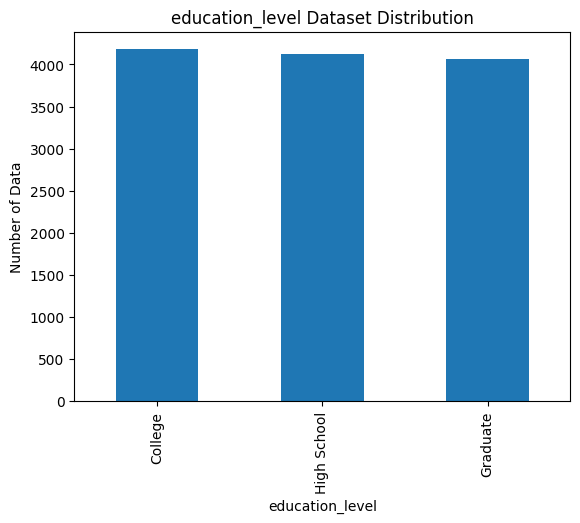

In [98]:
df['education_level'].value_counts().plot(kind='bar')
plt.xlabel("education_level")
plt.ylabel("Number of Data")
plt.xticks(rotation =90)
plt.title("education_level Dataset Distribution")

In [99]:
# Count the occurrences of each type of stressors
disorder_counts = df['stressors'].value_counts()

# Display the counts
print(disorder_counts)

Relationship problems     4158
Financial difficulties    4115
Work-related stress       4096
Name: stressors, dtype: int64


Text(0.5, 1.0, 'stressors Dataset Distribution')

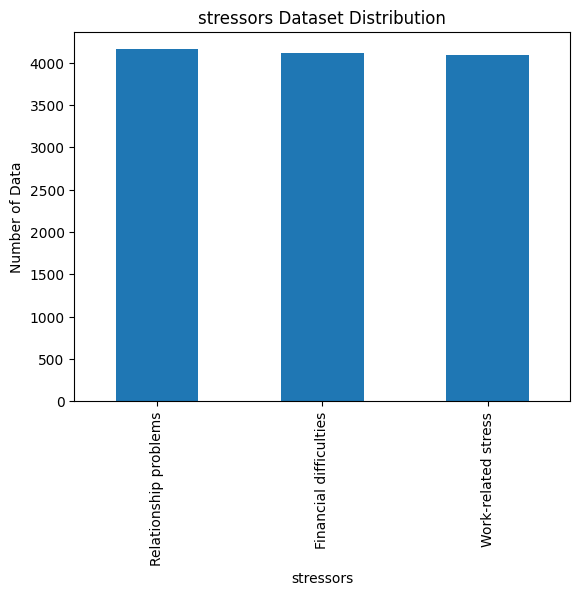

In [100]:
df['stressors'].value_counts().plot(kind='bar')
plt.xlabel("stressors")
plt.ylabel("Number of Data")
plt.xticks(rotation =90)
plt.title("stressors Dataset Distribution")

In [101]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [102]:
# Separate features (X) and target variable (y)
X = df.drop('psychiatric_disorder', axis=1)
y = df['psychiatric_disorder']

In [103]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [104]:
# Define preprocessing steps for categorical and numerical columns
categorical_cols = ['gender', 'education_level', 'symptom_checklist', 'behavior_patterns', 'diagnostic_tests', 'lifestyle_factors', 'stressors']
numerical_cols = ['age']

# Create preprocessing pipelines for both types of columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [105]:
# Create pipelines for different classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

In [109]:
from sklearn.metrics import accuracy_score

#Train and evaluate each classifier
for name, clf in classifiers.items():
    # Append classifier to preprocessing pipeline
    model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', clf)])

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) *9


    # Print the accuracy for each classifier
    print(f"Accuracy for {name}: {accuracy:.2f}")



Accuracy for Logistic Regression: 0.77
Accuracy for Decision Tree: 0.78
Accuracy for Random Forest: 0.73
Accuracy for SVM: 0.93
Accuracy for KNN: 0.73


In [107]:
# Input values for prediction
input_data = {
    'age': 15,
    'gender': 'Female',
    'education_level': 'Graduate',
    'symptom_checklist': 'Panic attacks',
    'behavior_patterns': 'Compulsive rituals',
    'diagnostic_tests': 'Beck Depression Inventory',
    'lifestyle_factors': 'Physical activity level',
    'stressors': 'Relationship problems'
}

# Convert input data to DataFrame
X_input = pd.DataFrame([input_data])

# Get the SVM classifier from the classifiers dictionary
svm_classifier = classifiers['SVM']

# Preprocess the input data
X_input_preprocessed = preprocessor.transform(X_input)

# Make prediction using SVM classifier
prediction = svm_classifier.predict(X_input_preprocessed)[0]

# Print the predicted psychiatric disorder
print(f"Predicted psychiatric disorder using SVM: {prediction}")

Predicted psychiatric disorder using SVM: Bipolar Disorder


In [108]:
import joblib
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Define preprocessing steps for categorical and numerical columns
categorical_cols = ['gender', 'education_level', 'symptom_checklist', 'behavior_patterns', 'diagnostic_tests', 'lifestyle_factors', 'stressors']
numerical_cols = ['age']

# Create preprocessing pipelines for both types of columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Create pipeline for SVM classifier
svm_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

# Fit the SVM classifier
svm_classifier.fit(X_train, y_train)

# Specify the file path for exporting the SVM model
svm_model_filename = 'Psychiatric_Disorder.pkl'

# Export the SVM model to a .pkl file
joblib.dump(svm_classifier, svm_model_filename)

print(f"SVM model exported to {svm_model_filename}")


SVM model exported to Psychiatric_Disorder.pkl
